In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb 
from scipy import stats
import arviz as az
from scipy.optimize import minimize

EJERCICIO 1

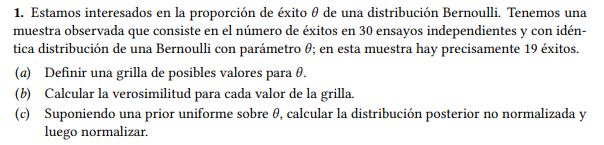

$$Y \sim Binomial(\theta,n) \hspace{0.5cm} (\text{likelihood})$$
$$\theta \sim U(0,1) \hspace{0.5cm} (\text{prior})$$

In [57]:
# 1) Defino una grilla de valores posibles para p
theta_grid = np.linspace(0, 1, 1000)

# 2) Defino y calculo el prior
prior_theta = stats.uniform.pdf(theta_grid)

# 3) Calculo la likelihood
y=19
n=30

likelihood_theta = stats.binom.pmf(k=y, n=n, p=theta_grid)

# 4) Calculo la posterior
posterior = prior_theta*likelihood_theta

# 5) Normalizo:
dtheta = np.diff(theta_grid)[0]
posterior /= np.sum(posterior*dtheta)

# Otra forma de normalizar:
# posterior /= np.trapz(posterior, theta_grid)

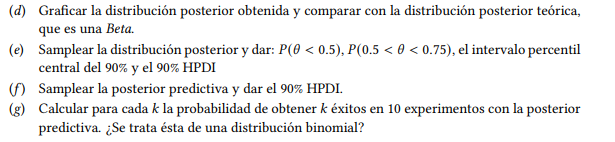

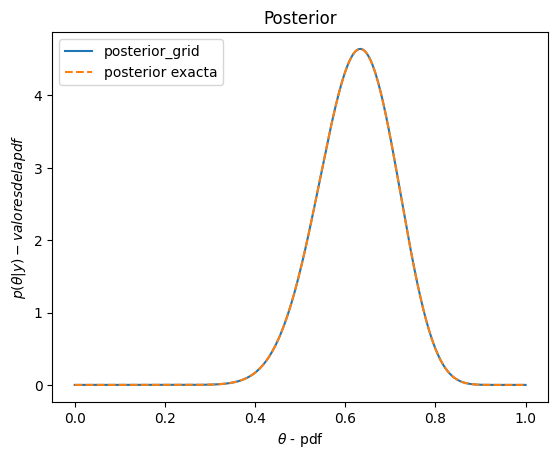

In [58]:
# Grafico
theta_finito = np.linspace(0, 1, 1000000)
posterior_exacta = stats.beta.pdf(theta_finito, a= y+1, b=n-y+1) #Para comparar grid sampling con la posterior exacta

plt.plot(theta_grid,posterior,label='posterior_grid')
plt.plot(theta_finito,posterior_exacta,'--',label='posterior exacta')
plt.ylabel(r'$p(\theta|y) - valores de la pdf$')
plt.xlabel(r'$\theta$ - pdf')
plt.legend()
plt.title('Posterior')
plt.show()

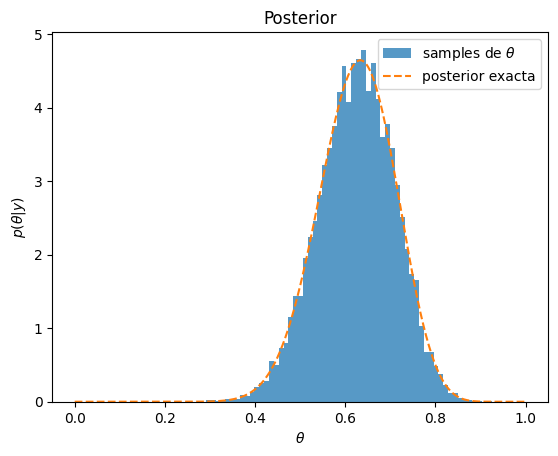

In [59]:
# SAMPLEO A PARTIR DE LA POSTERIOR
samples = np.random.choice(theta_grid, size=int(1e4), p=posterior*dtheta)

plt.hist(samples, bins='auto',density=True, alpha=0.75,label=r'samples de $\theta$') #density true normsliza
plt.plot(theta_finito,posterior_exacta,'--',label='posterior exacta')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.title('Posterior')
plt.show()


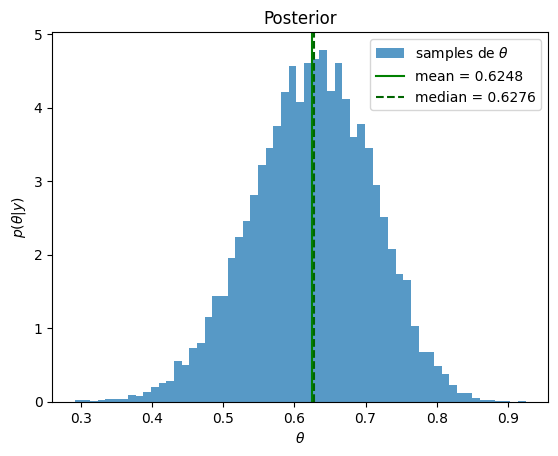

P(θ < 0.5) 0.0744
P(0.25 < θ < 0.75) 0.8619
PI 90% = [0.4815 0.7588]


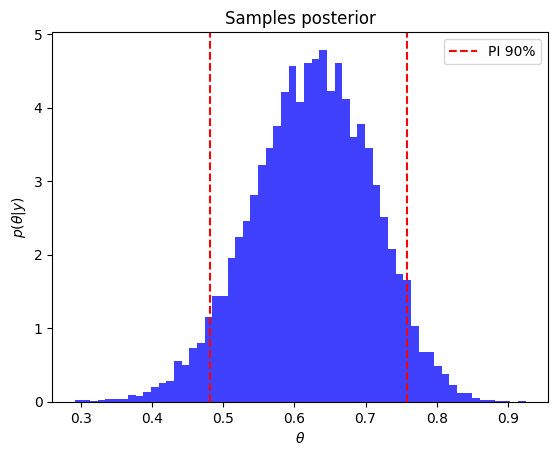

HDI 90% =  [0.49149149 0.76576577]


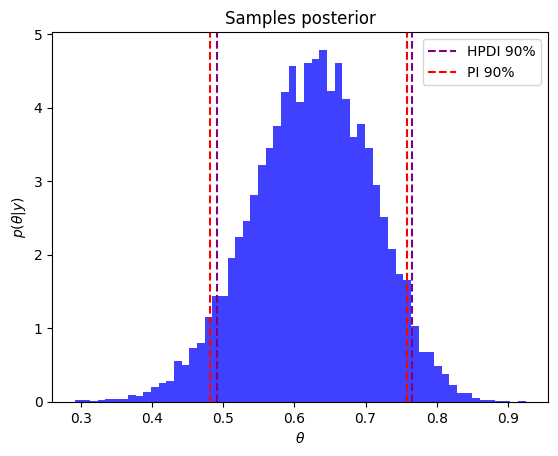

In [70]:
#MEDIDAS DE RESUMEN
#Cuando tengo dist simetrica son todos iguales
#Si es una asimetrica tengo que ver que estimador minimiza funcion de perdida.
#Si sin muy distintos, reporto todos, y en general, mejor es mostrar la dist completa

#ESTIMADORES PUNTUALES
mean = np.mean(samples)
median = np.median(samples)

plt.hist(samples, bins='auto',density=True, alpha=0.75,label=r'samples de $\theta$')
plt.axvline(mean,ls='-',color='g',label=f'mean = {mean:.4f}')
plt.axvline(median,ls='--',color='darkgreen',label=f'median = {median:.4f}')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.title('Posterior')
plt.show()

#INTERVALOS CON LIMITES DEFINIDOS . P en relacion con 1 o + valores
P_1 = np.sum(samples < 0.5) / len(samples) #simplemente sumar todos los que cumplan la condición (y normalizar)
P_2 = (np.sum(samples < 0.75) - np.sum(samples < 0.5)) / len(samples)
print('P(θ < 0.5)', P_1)
print('P(0.25 < θ < 0.75)', P_2)

#INTERVALOS DE MASAS DE PROBABILIDAD DEFINIDA - int de confianza

#Intervalo percentil
PI_90 = [np.quantile(samples, 0.05),np.quantile(samples,0.95)] 
#ese 90 puede ser cualquier intervalo que tenga noventa - ej (0,90) , (1,91), etc.
print('PI 90% =', np.round(PI_90,4))

plt.hist(samples, bins='auto', density=True, alpha=0.75, color='blue')
plt.axvline(PI_90[0],ls='--',color='r',label='PI 90%')
plt.axvline(PI_90[1],ls='--',color='r')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.title('Samples posterior')
plt.legend()
plt.show()

# PI_90_2 = [np.quantile(samples, 0.03),np.quantile(samples,.93)] 
# print('PI 90% =', np.round(PI_90_2,4))
# plt.hist(samples, bins='auto', density=True, alpha=0.75, color='blue')
# plt.axvline(PI_90_2[0],ls='--',color='r',label='PI 90%')
# plt.axvline(PI_90_2[1],ls='--',color='r')
# plt.ylabel(r'$p(\theta|y)$')
# plt.xlabel(r'$\theta$')
# plt.title('Samples posterior')
# plt.legend()
# plt.show()

#HIGHEST POSTERIOR DENSITY INTERVAL - HPDI
#Es el intervalo más angosto que contiene la probabilidad especificada 
#(es decir, el intervalo que encierra la densidad de probabilidad más alta).
#Tiene algunas ventajas respecto al PI pero en muchos casos ambos son similares.
#Cuando la posterior es simétrica y unimodal es casi lo mismo.

hpdi_90 = az.hdi(samples,hdi_prob=0.9)
print('HDI 90% = ',hpdi_90)

plt.hist(samples, bins='auto', density=True, alpha=0.75, color='blue')
plt.axvline(hpdi_90[0],ls='--',color='purple',label='HPDI 90%')
plt.axvline(hpdi_90[1],ls='--',color='purple')
plt.axvline(PI_90[0],ls='--',color='r',label='PI 90%')
plt.axvline(PI_90[1],ls='--',color='r')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.title('Samples posterior')
plt.legend()

al elegir un estimador puntual de $\theta$ estamos ignorando la incerteza asociada a ese parámetro. Para tener en cuenta esa incerteza, hay que integrar sobre todos los valores posibles de $\theta$ usando la distribución posterior: esta es la manera correcta de obtener una distribución posterior predictiva. Esta variabilidad hace que se ensanche la distribucion porque hay mas incerteza.

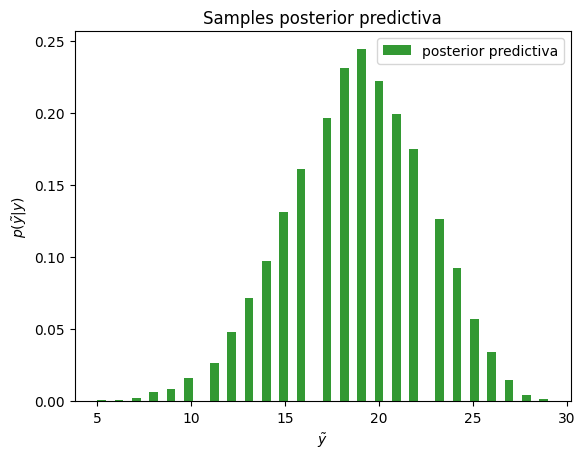

In [73]:
#POSTERIOR PREDICTIVE
samples_pred = stats.binom.rvs(n=30, p=samples, size=10000)

# Grafico las muestras
plt.hist(samples_pred, bins='auto', density=True, alpha=0.8, color='green',label='posterior predictiva')
plt.ylabel(r'$p(\tilde{y}|y)$')
plt.xlabel(r'$\tilde{y}$')
plt.title('Samples posterior predictiva')
plt.legend()

HDI 90% =  [12 24]


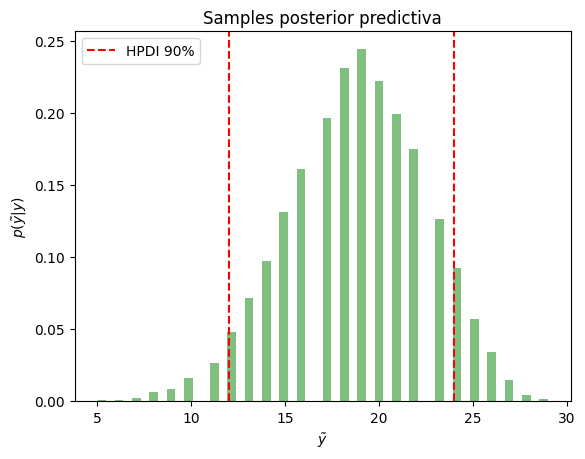

In [74]:
#HPDI de la posterior

hpdi_pred = az.hdi(samples_pred,hdi_prob=0.9)
print('HDI 90% = ',hpdi_pred)

# Grafico las muestras
plt.hist(samples_pred, bins='auto', density=True, alpha=0.5, color='green')
plt.axvline(hpdi_pred[0],ls='--',color='r',label='HPDI 90%')
plt.axvline(hpdi_pred[1],ls='--',color='r')
plt.ylabel(r'$p(\tilde{y}|y)$')
plt.xlabel(r'$\tilde{y}$')
plt.title('Samples posterior predictiva')
plt.legend()

Text(0.5, 1.0, 'Samples posterior predictiva')

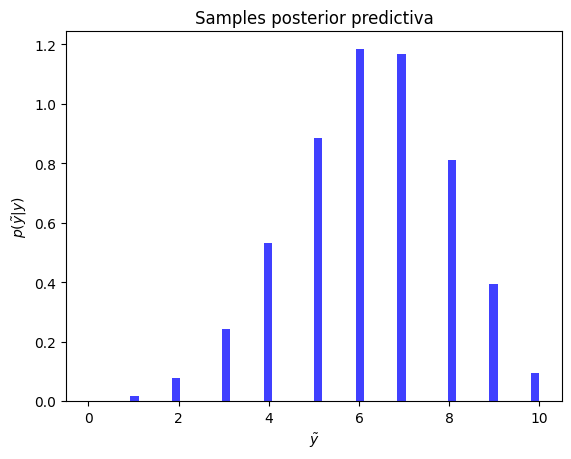

In [75]:
#PROBABILIDAD DE K EXITOS EN 10 EXPERIMENTOS

samples_pred = stats.binom.rvs(n=10, p=samples, size=10000)

# Grafico las muestras
plt.hist(samples_pred, bins='auto', density=True, alpha=0.75, color='blue')
plt.ylabel(r'$p(\tilde{y}|y)$')
plt.xlabel(r'$\tilde{y}$')
plt.title('Samples posterior predictiva')

EJERCICIO 2

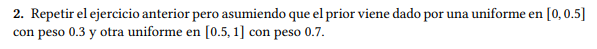

P(θ < 0.5) 0.0351
P(0.25 < θ < 0.75) 0.8925
PI 90% [0.5075075075075075, 0.7647647647647647]
HDI 90% (posterior) =  [0.5005005  0.75475475]
HDI 90% (posterior predictiva) =  [13 24]


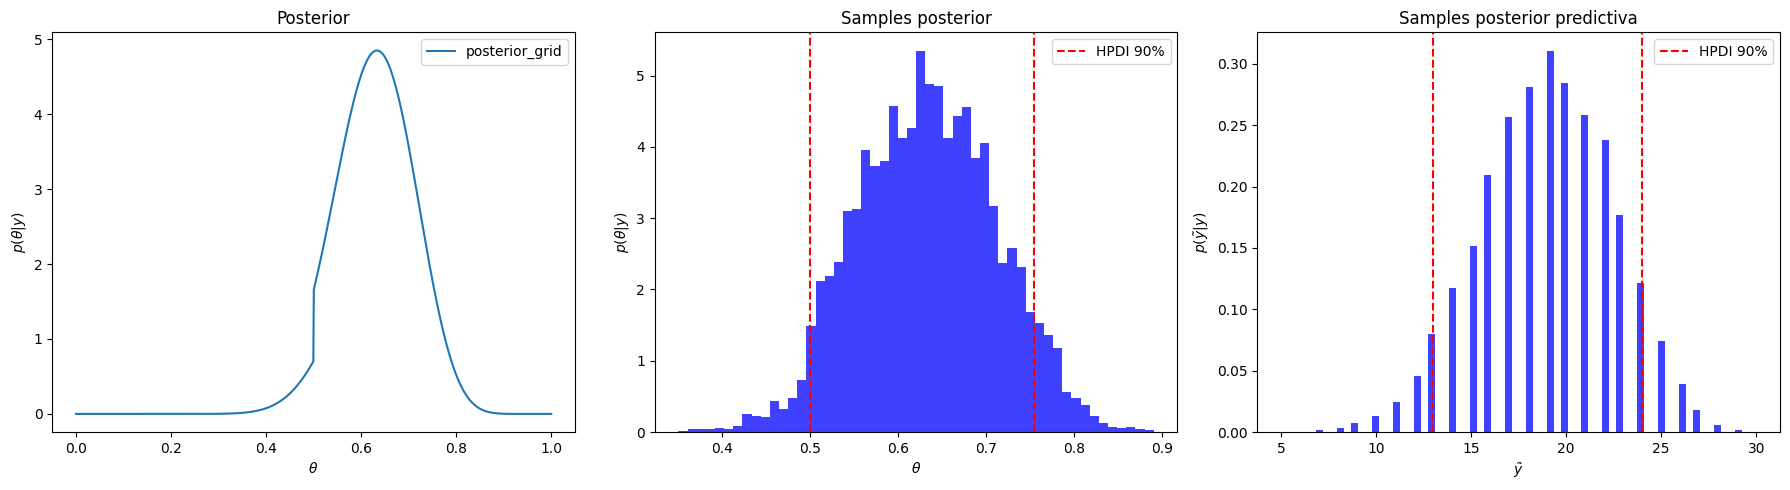

In [76]:
# (a) Defino una grilla de valores posibles para p
theta_grid = np.linspace(0, 1, 1000)

# (b) Calculo la likelihood
y = 19
n = 30
likelihood_theta = stats.binom.pmf(k=y, n=n, p=theta_grid)

# Defino el prior nuevo
prior_theta = np.zeros_like(theta_grid)
prior_theta[theta_grid <= 0.5] = 0.3
prior_theta[theta_grid > 0.5] = 0.7

# (c) Calculo la posterior y normalizo
posterior = prior_theta*likelihood_theta
dtheta = np.diff(theta_grid)[0]
posterior /= np.sum(posterior*dtheta)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Posterior grid
axes[0].plot(theta_grid, posterior, label='posterior_grid')
axes[0].set_ylabel(r'$p(\theta|y)$')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_title('Posterior')
axes[0].legend()


# (e) Genero muestras de la posterior
samples = np.random.choice(theta_grid, size=int(1e4), p=posterior*dtheta)

#Intervalos con límites definidos
P_1 = np.sum(samples < 0.5) / len(samples)
P_2 = (np.sum(samples < 0.75) - np.sum(samples < 0.5)) / len(samples)
print('P(θ < 0.5)', P_1)
print('P(0.25 < θ < 0.75)', P_2)

#Intervalo percentil
PI_90 = [np.quantile(samples, 0.05),np.quantile(samples,0.95)]
print('PI 90%', PI_90)

#HPDI
hpdi_90 = az.hdi(samples,hdi_prob=0.9)
print('HDI 90% (posterior) = ',hpdi_90)

# Plot 2: Muestras de la posterior
axes[1].hist(samples, bins='auto', density=True, alpha=0.75, color='blue')
axes[1].axvline(hpdi_90[0], ls='--', color='r', label='HPDI 90%')
axes[1].axvline(hpdi_90[1], ls='--', color='r')
axes[1].set_ylabel(r'$p(\theta|y)$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_title('Samples posterior')
axes[1].legend()

# Genero muestras de la posterior predictiva
samples_pred = stats.binom.rvs(n=30, p=samples, size=10000)

hpdi_pred = az.hdi(samples_pred,hdi_prob=0.9)
print('HDI 90% (posterior predictiva) = ', hpdi_pred)

# Plot 3: Muestras de la posterior predictiva
axes[2].hist(samples_pred, bins='auto', density=True, alpha=0.75, color='blue')
axes[2].axvline(hpdi_pred[0], ls='--', color='r', label='HPDI 90%')
axes[2].axvline(hpdi_pred[1], ls='--', color='r')
axes[2].set_ylabel(r'$p(\tilde{y}|y)$')
axes[2].set_xlabel(r'$\tilde{y}$')
axes[2].set_title('Samples posterior predictiva')
axes[2].legend()

plt.tight_layout()
plt.show()

EJERCICIO 3

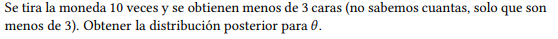

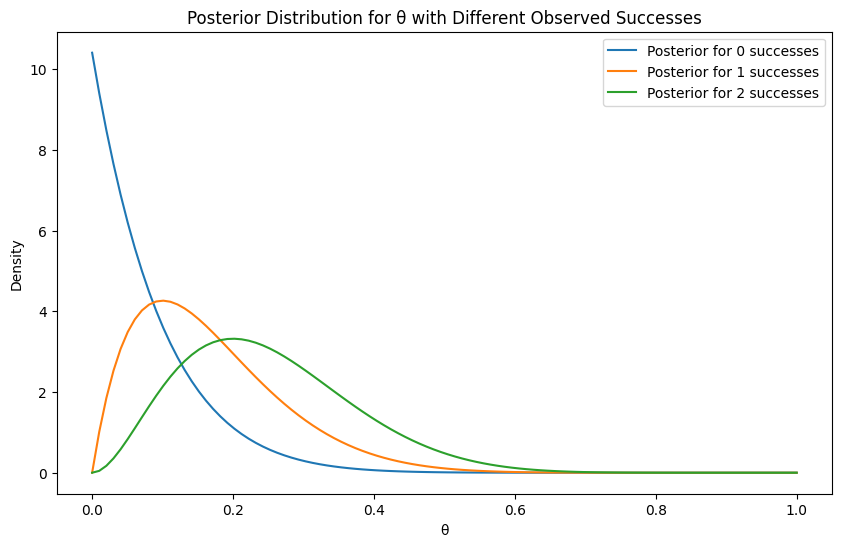

In [21]:
theta_grid = np.linspace(0, 1, 100)

observed_successes = [0, 1, 2]
trials = 10

plt.figure(figsize=(10, 6))

for y in observed_successes:
    likelihood_theta = stats.binom.pmf(k=y, n=trials, p=theta_grid)
    prior_theta = stats.uniform.pdf(theta_grid)
    posterior = prior_theta * likelihood_theta
    dtheta = np.diff(theta_grid)[0]
    posterior /= np.sum(posterior * dtheta)

    plt.plot(theta_grid, posterior, label=f'Posterior for {y} successes')

plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Distribution for θ with Different Observed Successes')
plt.show()


EJERCICIO 4

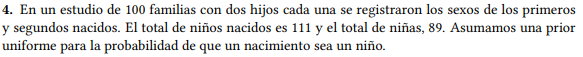

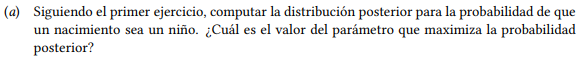

El valor del parámetro que maximiza la probabilidad posterior (MAP) es: 0.5555555555555556


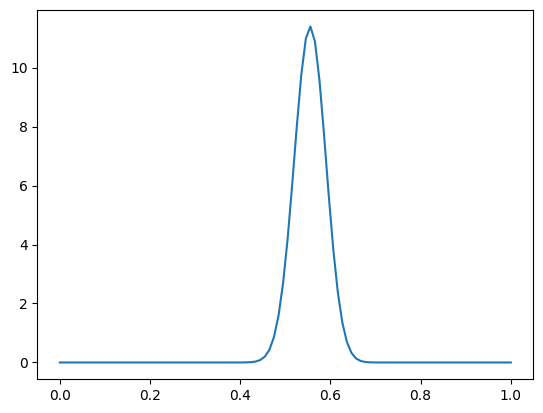

In [77]:
theta_grid = np.linspace(0, 1, 100)

trials = 200
successes = 111

likelihood_theta = stats.binom.pmf(k=successes, n=trials, p=theta_grid)
prior_theta = stats.uniform.pdf(theta_grid)
posterior = prior_theta * likelihood_theta
dtheta = np.diff(theta_grid)[0]
posterior /= np.sum(posterior * dtheta)

plt.plot(theta_grid, posterior, label=f'Posterior for {y} successes')

map_estimate = theta_grid[np.argmax(posterior)]

print(f"El valor del parámetro que maximiza la probabilidad posterior (MAP) es: {map_estimate}")

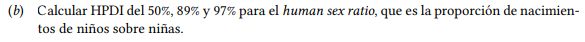

In [78]:
samples = np.random.choice(theta_grid, size=int(1e4), p=posterior*dtheta)

hpdi_50 = az.hdi(samples,hdi_prob=.5)
hpdi_89 = az.hdi(samples,hdi_prob=.89)
hpdi_97 = az.hdi(samples,hdi_prob=.97)

print('HpDI 50% = ',hpdi_50)
print('HpDI 89% = ',hpdi_89)
print('HpDI 97% = ',hpdi_97)

HpDI 50% =  [0.54545455 0.58585859]
HpDI 89% =  [0.49494949 0.60606061]
HpDI 97% =  [0.47474747 0.62626263]


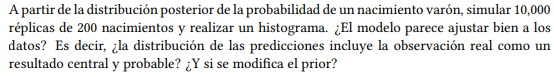

HPDI 90% (posterior predictiva) = [ 92 125]


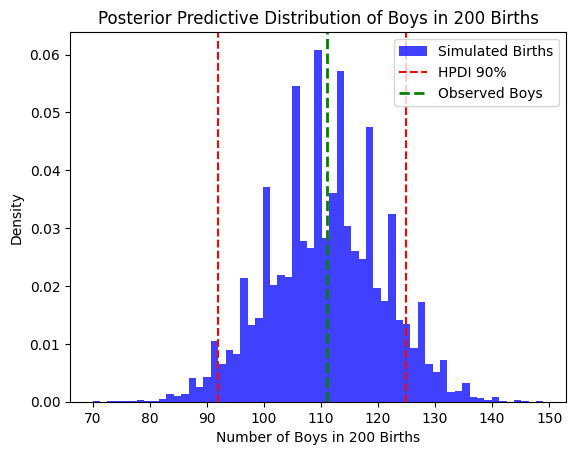

In [80]:
samples_pred = stats.binom.rvs(n=200, p=samples, size=10000)

hpdi_pred = az.hdi(samples_pred, hdi_prob=0.9)
print('HPDI 90% (posterior predictiva) =', hpdi_pred)

plt.hist(samples_pred, bins='auto', density=True, alpha=0.75, color='blue', label='Simulated Births')
plt.axvline(hpdi_pred[0], ls='--', color='r', label='HPDI 90%')
plt.axvline(hpdi_pred[1], ls='--', color='r')
plt.axvline(111, color='g', linestyle='dashed', linewidth=2, label='Observed Boys')
# plt.axvline(np.mean(samples_pred), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Boys in 200 Births')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution of Boys in 200 Births')
plt.show()


EJERCICIO 5

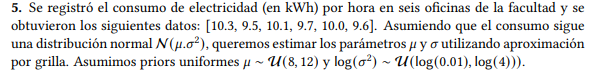

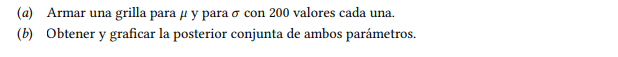

In [82]:
# DATOS
consumo = np.array([10.3, 9.5, 10.1, 9.7, 10.0, 9.6]) 
n = len(consumo)

mu_grid = np.linspace(8, 12, 200)
sigma_grid = np.linspace(np.sqrt(0.01), np.sqrt(4), 200)

prior_mu = np.ones(len(mu_grid)) # Prior uniforme en mu
prior_sigma = np.ones(len(sigma_grid)) / sigma_grid**2  # Prior uniforme en log(sigma^2)
prior = np.outer(prior_mu, prior_sigma) # Prior conjunto (matriz de 200*200)

In [83]:
# VEROSIMILITUD
likelihood = np.zeros((len(mu_grid), len(sigma_grid)))
for i, mu in enumerate(mu_grid):
    for j, sigma in enumerate(sigma_grid):
        likelihood[i, j] = np.prod(stats.norm.pdf(consumo, loc=mu, scale=sigma))

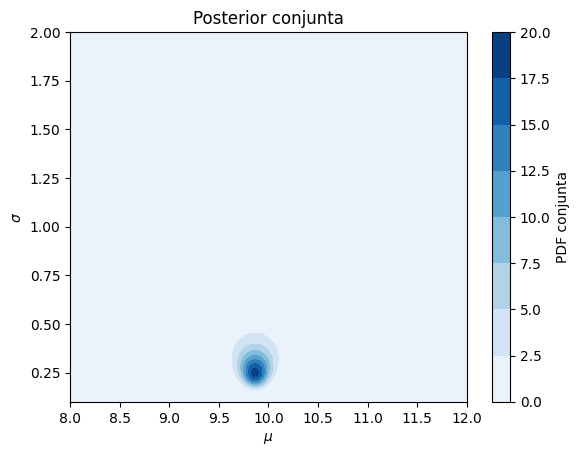

In [84]:
#POSTERIOR
posterior = likelihood * prior
dmu = np.diff(mu_grid)[0]
dsigma = np.diff(sigma_grid)[0]
posterior /= np.sum(posterior*dmu*dsigma)

plt.contourf(mu_grid, sigma_grid, posterior.T, cmap='Blues')
plt.colorbar(label='PDF conjunta')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('Posterior conjunta')
#plt.xlim(9,11)
#plt.ylim(0.1,0.6)
plt.show()

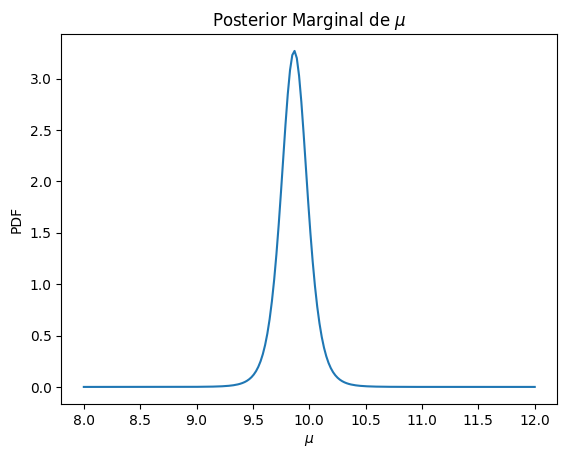

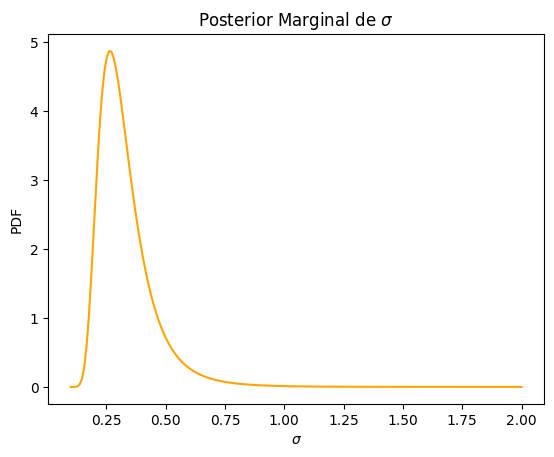

In [85]:
# Marginal para mu
posterior_mu = np.sum(posterior*dsigma, axis=1)

# Marginal para sigma
posterior_sigma = np.sum(posterior*dmu, axis=0)

plt.plot(mu_grid, posterior_mu, label=r'Posterior de $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel('PDF')
plt.title(r'Posterior Marginal de $\mu$')
plt.show()

plt.plot(sigma_grid, posterior_sigma, label=r'Posterior de $\sigma$', color='orange')
plt.xlabel(r'$\sigma$')
plt.ylabel('PDF')
plt.title(r'Posterior Marginal de $\sigma$')
plt.show()

EJERCICIO 6

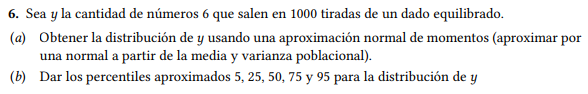

la dist de Y es binomial, la modelo con 6 = positivo y != 6 es negativo

Text(0.5, 0, 'y')

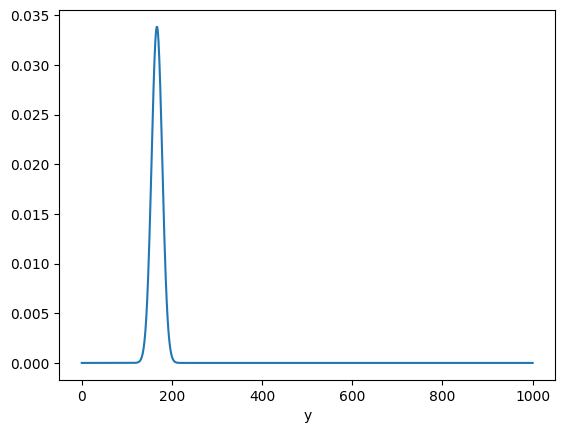

In [41]:
n = 1000
p = 1/6

espe_y = n * p
var_y = n * p * (1-p)

y = stats.norm.pdf(np.linspace(0,1000,1000),loc = espe_y ,scale=np.sqrt(var_y))

plt.plot(np.linspace(0,1000,1000),y)
plt.xlabel('y')

In [42]:
# son los valores de y para los cuales, a su izquiera se encuentran el x% de los datos
print('P-5:',round(stats.norm.ppf(0.05,loc = espe_y,scale=np.sqrt(var_y))))
print('P-25:',round(stats.norm.ppf(0.25,loc = espe_y,scale=np.sqrt(var_y))))
print('P-50:',round(stats.norm.ppf(0.50,loc = espe_y,scale=np.sqrt(var_y))))
print('P-75:',round(stats.norm.ppf(0.75,loc = espe_y,scale=np.sqrt(var_y))))
print('P-95:',round(stats.norm.ppf(0.95,loc = espe_y,scale=np.sqrt(var_y))))

P-5: 147
P-25: 159
P-50: 167
P-75: 175
P-95: 186


EJERCICIO 7

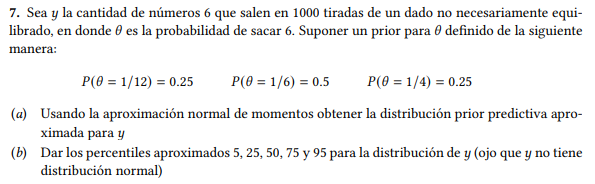

In [44]:
prior_12 = 0.25
prior_6 = 0.5
prior_4 = 0.25

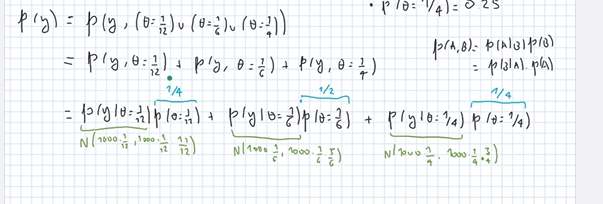

(0.0, 350.0)

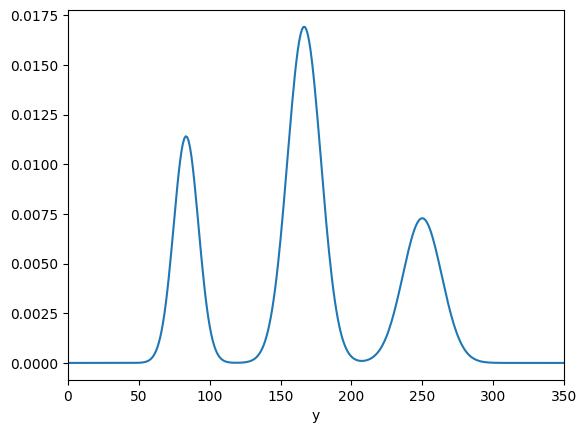

In [88]:
n = 1000

p=1/12
L_12 = stats.norm.pdf(np.linspace(0,1000,1000), loc = n*p,scale=np.sqrt(n*p*(1-p)))
p=1/6
L_6 = stats.norm.pdf(np.linspace(0,1000,1000),loc = n*p,scale=np.sqrt(n*p*(1-p)))
p=1/4
L_4 = stats.norm.pdf(np.linspace(0,1000,1000),loc = n*p,scale=np.sqrt(n*p*(1-p)))

p_y = L_12*prior_12 + L_6*prior_6 + L_4*prior_4


plt.plot(np.linspace(0,1000,1000),p_y)
plt.xlabel('y')
plt.xlim(0,350)

razonamiento de los percentiles: cada normal es simetrica, si yo la aprto al medio con la mediana me da la mitad de cada una y no se solapan o sea que estan separadas. 

cada campana se lleva de probabilidad el prior. las L_n integran a 1 y se ven multiplicadas por la prob del prior, para que P(y) pueda integrar a 1.
0
la probabilidad 50% total, es la mediana de la que se lleva el 50% del medio

sirve solamente si las campanas no estan encimadas

In [89]:
print('P-5:',round(stats.norm.ppf(0.20,loc = n/12,scale=np.sqrt(n * (11/12) * (1/12)))))
print('P-25:',120,'(a vista)')
print('P-50:',round(stats.norm.ppf(0.50,loc = n/6,scale=np.sqrt(n * (5/6) * (1/6)))))
print('P-75:',205,'(a vista)')
print('P-95:',round(stats.norm.ppf(0.80,loc = n/4,scale=np.sqrt(n * (3/4) * (1/4)))))

P-5: 76
P-25: 120 (a vista)
P-50: 167
P-75: 205 (a vista)
P-95: 262


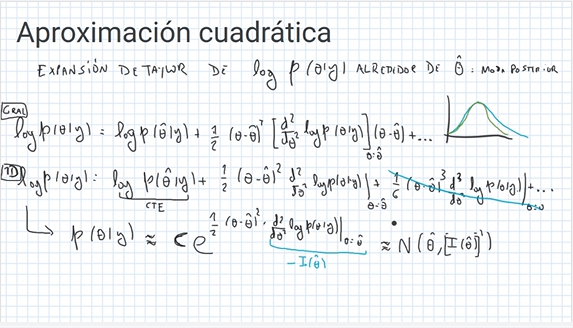

es una aproximacion especifica localmente

EJERCICIO 8

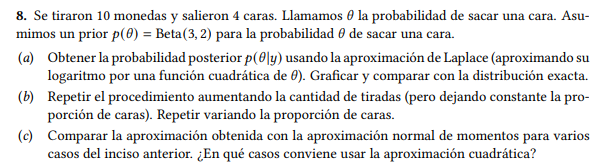

In [91]:
monedas = 10
caras = 4
alpha_prior = 3
beta_prior = 2

theta = np.linspace(0, 1, 1000)
posterior_exacta = stats.beta.pdf(theta, alpha_prior + caras, beta_prior + (n - caras))



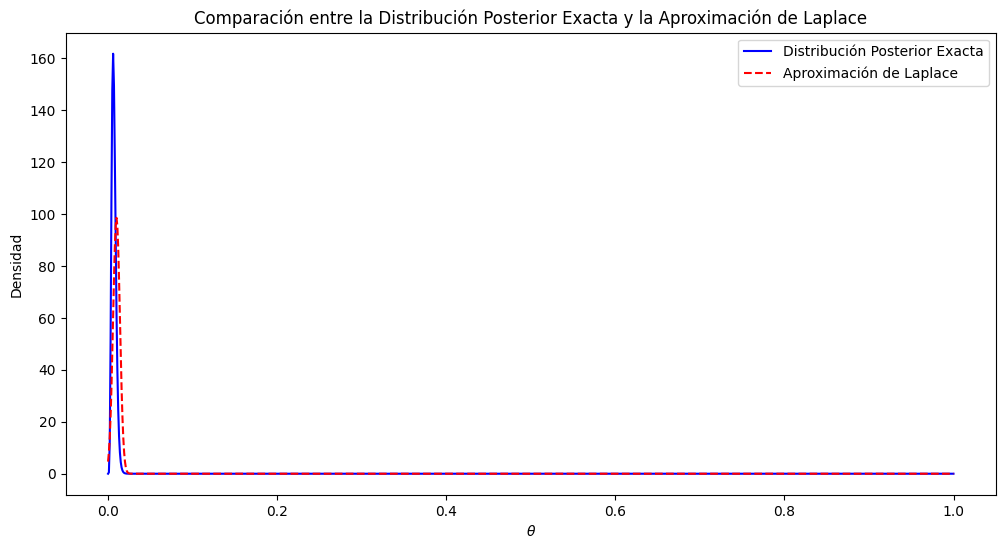

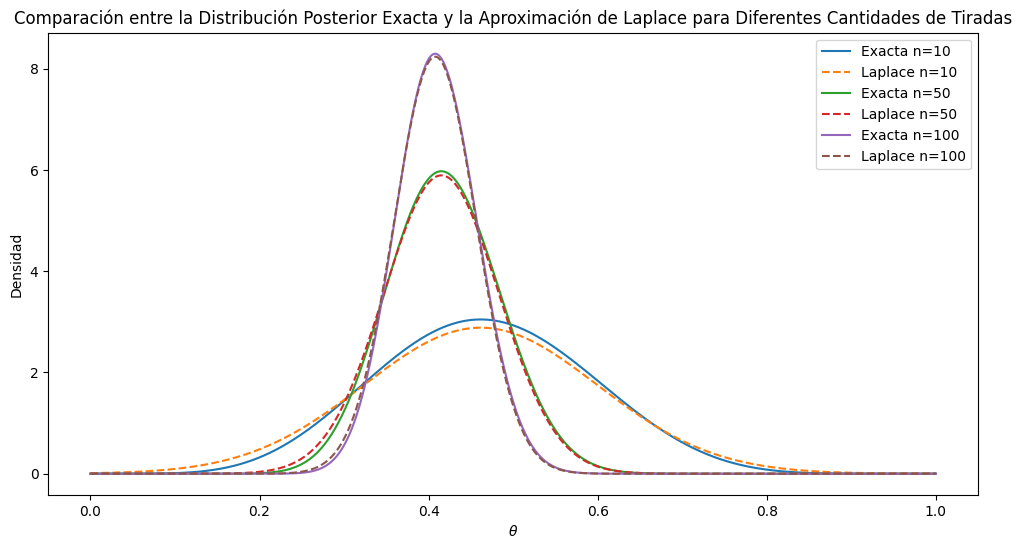

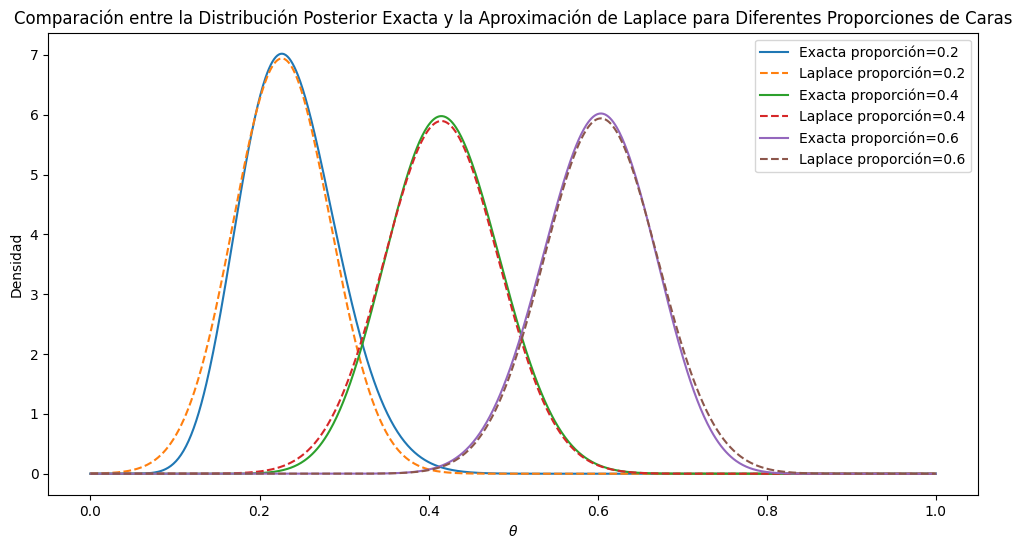

In [92]:
log_posterior = lambda theta: (alpha_posterior - 1) * np.log(theta) + (beta_posterior - 1) * np.log(1 - theta)

# Derivadas del logaritmo de la distribución posterior
log_posterior_prime = lambda theta: (alpha_posterior - 1) / theta - (beta_posterior - 1) / (1 - theta)
log_posterior_double_prime = lambda theta: -(alpha_posterior - 1) / theta**2 - (beta_posterior - 1) / (1 - theta)**2

# Encontrar el modo de la distribución posterior (máximo del log-posterior)
mode_result = minimize(lambda x: -log_posterior(x), 0.5, bounds=[(0.01, 0.99)])
mode = mode_result.x[0]

# Calcular la varianza de la aproximación normal
variance_laplace = -1 / log_posterior_double_prime(mode)

# Aproximación normal de Laplace
posterior_laplace = stats.norm.pdf(theta, mode, np.sqrt(variance_laplace))

# Graficar las distribuciones
plt.figure(figsize=(12, 6))
plt.plot(theta, posterior_exacta, label='Distribución Posterior Exacta', color='blue')
plt.plot(theta, posterior_laplace, label='Aproximación de Laplace', color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.title('Comparación entre la Distribución Posterior Exacta y la Aproximación de Laplace')
plt.legend()
plt.show()

# Repetir el procedimiento aumentando la cantidad de tiradas pero dejando constante la proporción de caras
n_values = [10, 50, 100]
k_values = [int(n * 0.4) for n in n_values]  # Manteniendo la proporción de caras en 0.4

plt.figure(figsize=(12, 6))

for n, k in zip(n_values, k_values):
    alpha_posterior = alpha_prior + k
    beta_posterior = beta_prior + (n - k)
    
    posterior_exact = stats.beta.pdf(theta, alpha_posterior, beta_posterior)
    
    mode_result = minimize(lambda x: -log_posterior(x), 0.5, bounds=[(0.01, 0.99)])
    mode = mode_result.x[0]
    variance_laplace = -1 / log_posterior_double_prime(mode)
    posterior_laplace = stats.norm.pdf(theta, mode, np.sqrt(variance_laplace))
    
    plt.plot(theta, posterior_exact, label=f'Exacta n={n}', linestyle='-')
    plt.plot(theta, posterior_laplace, label=f'Laplace n={n}', linestyle='--')

plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.title('Comparación entre la Distribución Posterior Exacta y la Aproximación de Laplace para Diferentes Cantidades de Tiradas')
plt.legend()
plt.show()

# Repetir variando la proporción de caras
proportions = [0.2, 0.4, 0.6]
n_fixed = 50
k_values = [int(n_fixed * p) for p in proportions]

plt.figure(figsize=(12, 6))

for k in k_values:
    alpha_posterior = alpha_prior + k
    beta_posterior = beta_prior + (n_fixed - k)
    
    posterior_exact = stats.beta.pdf(theta, alpha_posterior, beta_posterior)
    
    mode_result = minimize(lambda x: -log_posterior(x), 0.5, bounds=[(0.01, 0.99)])
    mode = mode_result.x[0]
    variance_laplace = -1 / log_posterior_double_prime(mode)
    posterior_laplace = stats.norm.pdf(theta, mode, np.sqrt(variance_laplace))
    
    plt.plot(theta, posterior_exact, label=f'Exacta proporción={k/n_fixed:.1f}', linestyle='-')
    plt.plot(theta, posterior_laplace, label=f'Laplace proporción={k/n_fixed:.1f}', linestyle='--')

plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.title('Comparación entre la Distribución Posterior Exacta y la Aproximación de Laplace para Diferentes Proporciones de Caras')
plt.legend()
plt.show()

EJERCICIO 9

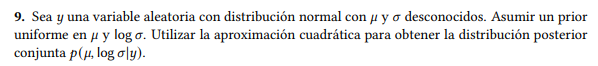

En este problema, se asume que la variable aleatoria \( y \) sigue una distribución normal \( \mathcal{N}(\mu, \sigma^2) \), donde tanto \( \mu \) como \( \sigma \) son parámetros desconocidos. Además, se supone que el prior es uniforme en \( \mu \) y en \( \log \sigma \). El objetivo es encontrar la distribución posterior conjunta \( p(\mu, \log \sigma \mid y) \) utilizando la **aproximación cuadrática** (también conocida como **aproximación de Laplace**).

Vamos a resolver el problema paso a paso.

### Paso 1: Definición del modelo

Sabemos que la distribución de \( y \) es normal, por lo que la función de verosimilitud es:

\[
p(y \mid \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(y_i - \mu)^2}{2\sigma^2} \right)
\]

La log-verosimilitud correspondiente es:

\[
\log p(y \mid \mu, \sigma) = -\frac{n}{2} \log(2\pi) - n \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2
\]

### Paso 2: Priors

Se nos indica que el prior es uniforme en \( \mu \) y en \( \log \sigma \). Entonces, los priors son:

- \( p(\mu) \) es constante (uniforme) en \( \mu \), es decir, \( p(\mu) \propto 1 \).
- \( p(\log \sigma) \) es constante (uniforme) en \( \log \sigma \), es decir, \( p(\log \sigma) \propto 1 \).

### Paso 3: Función objetivo

La **función objetivo** es el producto de la verosimilitud y los priors. Como los priors son constantes, la posterior es proporcional a la verosimilitud. Es decir, tenemos la siguiente expresión para la posterior:

\[
p(\mu, \log \sigma \mid y) \propto p(y \mid \mu, \sigma) p(\mu) p(\log \sigma)
\]

Sustituyendo la log-verosimilitud:

\[
p(\mu, \log \sigma \mid y) \propto \exp \left( -\frac{n}{2} \log(2\pi) - n \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2 \right)
\]

### Paso 4: Aproximación cuadrática (aproximación de Laplace)

La aproximación cuadrática se utiliza para aproximar la posterior en torno al **máximo a posteriori** (MAP) mediante una expansión de Taylor de segundo orden alrededor del MAP. Específicamente, podemos usar la **aproximación de Laplace**, que en este caso implica expandir la log-posterior en torno a los valores de \( \mu \) y \( \log \sigma \) que maximizan la posterior.

Para ello, realizamos los siguientes pasos:

1. **Encontrar el valor de \( \mu \) y \( \log \sigma \) que maximiza la log-posterior** (esto nos da el punto de máxima verosimilitud, es decir, el valor MAP).
2. **Expansión de Taylor de segundo orden** alrededor de este máximo para obtener la forma cuadrática de la posterior.


#### 1. Maximización de la log-posterior

Para encontrar el valor de \( \mu \) y \( \sigma \) que maximiza la log-posterior, necesitamos derivar la log-posterior con respecto a \( \mu \) y \( \log \sigma \) e igualarlas a cero.

##### Derivada respecto a \( \mu \):

La log-verosimilitud con respecto a \( \mu \) es:

\[
\log p(y \mid \mu, \sigma) = -n \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2
\]

Derivando respecto a \( \mu \):

\[
\frac{\partial}{\partial \mu} \log p(y \mid \mu, \sigma) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (y_i - \mu)
\]

Igualando a cero:

\[
\sum_{i=1}^{n} (y_i - \mu) = 0
\]

De aquí obtenemos que el valor de \( \mu \) que maximiza la log-verosimilitud es:

\[
\mu_{\text{MAP}} = \frac{1}{n} \sum_{i=1}^{n} y_i = \bar{y}
\]

##### Derivada respecto a \( \log \sigma \):

La log-verosimilitud con respecto a \( \log \sigma \) es:

\[
\log p(y \mid \mu, \sigma) = -n \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2
\]

Derivando respecto a \( \log \sigma \), recordando que \( \log \sigma \) es la variable, y utilizando la regla de la cadena:

\[
\frac{\partial}{\partial \log \sigma} \log p(y \mid \mu, \sigma) = -n \cdot \frac{1}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (y_i - \mu)^2
\]

Igualando a cero:

\[
n \cdot \frac{1}{\sigma} = \frac{1}{\sigma^3} \sum_{i=1}^{n} (y_i - \mu)^2
\]

De aquí obtenemos que el valor de \( \sigma \) que maximiza la log-verosimilitud es:

\[
\sigma_{\text{MAP}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \mu)^2}
\]

#### 2. Aproximación cuadrática (expansión de Taylor de segundo orden)

Una vez que tenemos los valores \( \mu_{\text{MAP}} \) y \( \sigma_{\text{MAP}} \), realizamos una expansión de Taylor de segundo orden en torno a estos valores. Esto implica aproximar la log-posterior en una vecindad de \( \mu_{\text{MAP}} \) y \( \sigma_{\text{MAP}} \) por una cuadrática.

La expansión de segundo orden de la log-posterior es de la forma:

\[
\log p(\mu, \log \sigma \mid y) \approx \log p(\mu_{\text{MAP}}, \log \sigma_{\text{MAP}} \mid y) - \frac{1}{2} \left( \mu - \mu_{\text{MAP}} \right)^T H \left( \mu - \mu_{\text{MAP}} \right)
\]

Donde \( H \) es la matriz Hessiana, que contiene las segundas derivadas parciales de la log-posterior respecto a \( \mu \) y \( \log \sigma \).

---

### Paso 5: Resumen

- **Distribución posterior**: La distribución posterior de \( \mu \) y \( \log \sigma \) es aproximadamente normal, con la forma cuadrática dada por la aproximación de Laplace.
  
  La **media posterior** es el valor MAP, es decir, \( \mu_{\text{MAP}} = \bar{y} \) y \( \sigma_{\text{MAP}} \).
  
  La **varianza posterior** puede ser calculada a partir de la matriz Hessiana de la log-posterior.

- **Interpretación**: Esta aproximación cuadrática proporciona una forma de aproximar la distribución posterior de parámetros desconocidos en un modelo de distribución normal con prior uniforme en \( \mu \) y \( \log \sigma \).

EJERCICIO 10

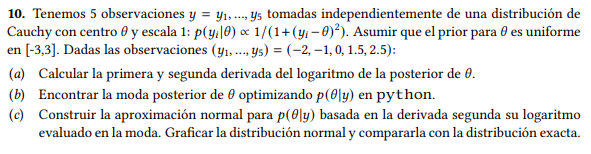

In [101]:
y = np.array([-2, -1, 0, 1.5, 2.5])

def neg_log_posterior(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = -np.sum(np.log(1 + (y - theta)**2)) #+np.log(6)
    return -log_posterior

def log_posterior_prime(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    return 2*np.sum((y - theta) / (1 + (y - theta)**2))

def log_posterior_prime2(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    return -2 * np.sum((1 - (y - theta)**2) / (1 + (y - theta)**2)**2)

initial_theta = 0.5
res = minimize(neg_log_posterior, initial_theta, args=(y,))
posterior_mode = res.x[0]


I = -log_posterior_prime2(posterior_mode,y)
std_approx = np.sqrt(1/I)

print(f"La moda posterior de θ es aproximadamente: {posterior_mode:.4f}")
print(f"El desvío estándar aproximado es: {std_approx:.4f}")


La moda posterior de θ es aproximadamente: -0.1377
El desvío estándar aproximado es: 0.8528


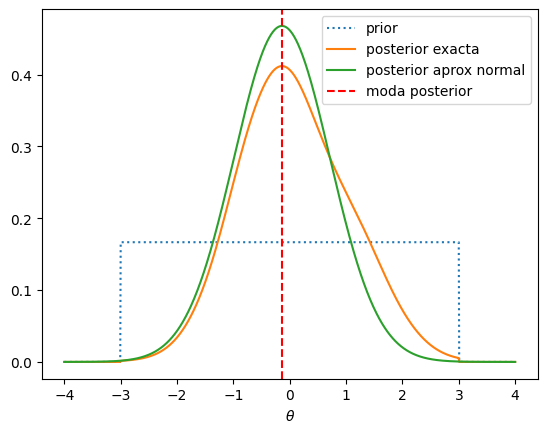

In [102]:
x=np.linspace(-4, 4, 1000)

normal_density = stats.norm.pdf(x, loc=posterior_mode, scale=std_approx)

def posterior(theta, y):
    if theta < -3 or theta > 3:
        return 0
    log_likelihood = -np.sum(np.log(1 + (y - theta)**2))
    return np.exp(log_likelihood)

exact_posterior = np.array([posterior(theta, y) for theta in x]) #normalizo
exact_posterior /= np.trapz(exact_posterior, x)


prior = stats.uniform.pdf(x,-3,6)

plt.plot(x, prior, label='prior', linestyle='dotted')
plt.plot(x, exact_posterior, label='posterior exacta')
plt.plot(x, normal_density, label='posterior aprox normal')
plt.axvline(posterior_mode, color='r', linestyle='--', label='moda posterior')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()


¡Claro! Te explicaré la **aproximación cuadrática** y la **aproximación de Laplace** desde una perspectiva teórica, porque ambas son herramientas clave en estadística bayesiana, especialmente cuando tratamos de obtener distribuciones posteriores en problemas complejos. Estas aproximaciones son particularmente útiles cuando la posterior no tiene una forma cerrada o es difícil de manejar directamente.

### 1. **Contexto del Problema**

En muchos problemas de inferencia bayesiana, deseamos calcular la **distribución posterior** de los parámetros \( \theta \) dados los datos \( y \), es decir, queremos obtener:

\[
p(\theta \mid y) \propto p(y \mid \theta) p(\theta)
\]

Sin embargo, obtener esta distribución directamente puede ser muy complicado, especialmente cuando las distribuciones involucradas no son de forma simple o conocida. Una aproximación que se usa comúnmente en estos casos es la **aproximación cuadrática**, también conocida como la **aproximación de Laplace**.

### 2. **¿Qué es la Aproximación Cuadrática o de Laplace?**

La **aproximación cuadrática** (o **aproximación de Laplace**) es una técnica que se utiliza para aproximar una distribución complicada por una distribución más simple, normalmente una **distribución normal**. 

El objetivo es aproximar la **distribución posterior** \( p(\theta \mid y) \) por una **distribución normal** de la forma:

\[
p(\theta \mid y) \approx \mathcal{N}(\hat{\theta}, \Sigma)
\]

Donde:
- \( \hat{\theta} \) es el **punto de máxima verosimilitud** (MLE) o **máxima verosimilitud a posteriori** (MAP).
- \( \Sigma \) es la **matriz de varianzas** que describe la dispersión de los parámetros alrededor de \( \hat{\theta} \).

Esta técnica se basa en una expansión de **Taylor de segundo orden** alrededor del punto donde la log-verosimilitud o log-posterior alcanza su máximo (el punto MAP). 

#### Pasos generales de la aproximación:

1. **Encuentra el punto MAP**: Es el valor de los parámetros \( \hat{\theta} \) que maximiza la log-posterior:

   \[
   \hat{\theta} = \arg\max_{\theta} \log p(\theta \mid y)
   \]

2. **Expansión de Taylor**: A partir de \( \hat{\theta} \), expandimos la log-posterior en una serie de Taylor de segundo orden. Esto nos da una aproximación cuadrática de la log-posterior cerca del máximo.

3. **Aproximación Normal**: Al hacer esta expansión, podemos aproximar la distribución posterior \( p(\theta \mid y) \) por una distribución normal de media \( \hat{\theta} \) y covarianza \( \Sigma \).

### 3. **Expansión de Taylor**

La **expansión de Taylor de segundo orden** de una función \( f(\theta) \) alrededor de un punto \( \hat{\theta} \) se ve de la siguiente forma:

\[
f(\theta) \approx f(\hat{\theta}) + \frac{1}{2} (\theta - \hat{\theta})^T \nabla^2 f(\hat{\theta}) (\theta - \hat{\theta})
\]

Donde:
- \( \nabla^2 f(\hat{\theta}) \) es la **matriz Hessiana** de la función \( f(\theta) \), que es la matriz de derivadas parciales de segundo orden de la función en \( \hat{\theta} \).
- \( f(\hat{\theta}) \) es el valor de la función en el punto \( \hat{\theta} \).

En el contexto de la **log-posterior**, esta expansión alrededor del punto MAP nos da una aproximación de la log-posterior como una función cuadrática:

\[
\log p(\theta \mid y) \approx \log p(\hat{\theta} \mid y) - \frac{1}{2} (\theta - \hat{\theta})^T H (\theta - \hat{\theta})
\]

Donde \( H = -\nabla^2 \log p(\theta \mid y) \) es la **matriz Hessiana de la log-posterior** en el punto \( \hat{\theta} \).

Esta forma cuadrática es la base para aproximar la posterior por una distribución normal.

### 4. **¿Por qué una Normal?**

Después de la expansión cuadrática, obtenemos una **función cuadrática** en los parámetros \( \theta \), que es una forma muy similar a la densidad de una distribución **normal**. Por lo tanto, podemos aproximar la posterior con una distribución normal centrada en \( \hat{\theta} \) (el valor MAP) con una varianza determinada por la Hessiana \( H \). En otras palabras:

\[
p(\theta \mid y) \approx \mathcal{N}(\hat{\theta}, H^{-1})
\]

Aquí \( H^{-1} \) es la **inversa de la matriz Hessiana**, que se interpreta como la matriz de covarianza de la distribución normal.

### 5. **¿Qué es la Aproximación de Laplace?**

La **aproximación de Laplace** es un caso específico de la aproximación cuadrática. Se llama "de Laplace" en honor a Pierre-Simon Laplace, quien introdujo esta técnica en el contexto de la inferencia bayesiana. En términos más simples:

- **Aproximación cuadrática** se refiere a la expansión de la log-verosimilitud en términos de una **función cuadrática**.
- **Aproximación de Laplace** es la aproximación de la distribución posterior por una **distribución normal** utilizando esta expansión cuadrática.

Es decir, si la log-verosimilitud es aproximadamente cuadrática alrededor del máximo, entonces la posterior se aproxima por una normal centrada en el MAP, con una varianza dada por la inversa de la Hessiana de la log-verosimilitud.

### 6. **Interpretación de la Aproximación**

La aproximación cuadrática de Laplace tiene la ventaja de ser **computacionalmente eficiente** porque nos permite aproximar una distribución posterior complicada por una distribución normal, lo que simplifica enormemente el cálculo de intervalos de confianza, predicciones, y otros análisis. 

- **MAP**: El punto \( \hat{\theta} \) es el valor de los parámetros que mejor explica los datos en términos de máxima verosimilitud a posteriori.
- **Covarianza**: La matriz \( H^{-1} \) proporciona una medida de la **incertidumbre** sobre los parámetros alrededor del valor MAP. Cuanto más pequeña es la covarianza, más confiable es la estimación de \( \hat{\theta} \).

### 7. **Ventajas y Desventajas**

**Ventajas**:
- **Simplicidad computacional**: La normal es fácil de manejar, lo que hace que las tareas de inferencia sean mucho más fáciles de calcular.
- **Rápido y eficiente**: La aproximación cuadrática suele ser más eficiente computacionalmente que técnicas como el muestreo de Monte Carlo.

**Desventajas**:
- **Aproximación local**: La aproximación cuadrática solo es precisa cuando la log-posterior es aproximadamente cuadrática alrededor de \( \hat{\theta} \). Si la posterior es muy no lineal o multimodal, esta aproximación puede no ser válida.
- **No captura la multimodalidad**: Si la posterior tiene múltiples picos (es decir, es multimodal), la aproximación de Laplace no podrá capturarlos.

---

### Resumen

La **aproximación cuadrática** o **de Laplace** se basa en una expansión de Taylor de segundo orden alrededor del punto de máxima verosimilitud de la log-posterior. Esta técnica aproxima la posterior como una distribución normal centrada en el punto MAP, con una varianza dada por la inversa de la Hessiana de la log-posterior. Es especialmente útil cuando la posterior no tiene una forma cerrada y proporciona una forma computacionalmente eficiente de hacer inferencia en modelos bayesianos complejos.

Si tienes alguna pregunta o necesitas más detalles sobre algún paso, no dudes en preguntar. ¡Estoy aquí para ayudar!